In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('task_prep.csv', sep=';')
df

visit_score  product_search_score  ctr_score  stay_score  \
0       22.500174              3.702145   0.118811    0.093253   
1       13.225950              3.600102   0.130985    0.053575   
2       14.603376              5.084047  -0.004651   -0.036299   
3       26.149905              3.025501   0.229740    0.204591   
4       19.810630              5.020400  -0.011347   -0.028780   
...           ...                   ...        ...         ...   
7155    18.164300              7.240835  -0.056238   -0.177289   
7156    25.363705              4.881059   0.038720    0.054397   
7157    11.160720              5.019859   0.053864   -0.102337   
7158    17.140020              9.269037   0.059911   -0.004299   
7159    10.698835             10.714282   0.475469    0.014124   

      frequency_score  product_variation_score  order_score  \
0           -0.372171                 1.755587     3.748009   
1           -1.946621                 1.371272     3.469659   
2           -1.097486                 1.448015     3.855939   
3            1.326652                 1.937680     2.362421   
4           -1.248827                 1.522902     3.278624   
...               ...                      ...          ...   
7155        -1.088837                 1.397004     4.758199   
7156         0.897137                 2.025810     1.823892   
7157         1.603054                 2.150058     2.422193   
7158        -1.028902                 1.433648     3.715392   
7159         3.112183                 2.380085     1.571717   

      customer_active_segment  X1  
0                           3   3  
1                           3   1  
2                           3   1  
3                           3   3  
4                           4   3  
...                       ...  ..  
7155                        4   1  
7156                        4   3  
7157                        4   3  
7158                        4   3  
7159                        3   3  

[7160 rows x 9 columns]

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)

In [4]:
X = df[:, [4,5,6,8]]

In [5]:
pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-py3-none-any.whl size=17088 sha256=e4e66150752e4e1003859775738b4b3361cb13cbcd498b0fee9e06e97d0cd0ef
  Stored in directory: /home/jovyan/.cache/pip/wheels/22/93/66/28200809b28a3685b5040db97cbc27ddd8b1a6372101244102
Successfully built SimpSOM
Note: you may need to restart the kernel to use updated packages.


In [6]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(20, 40, X, PBC=True)
net.train(0.01, 10000)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... 0% 

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

Training SOM... done!


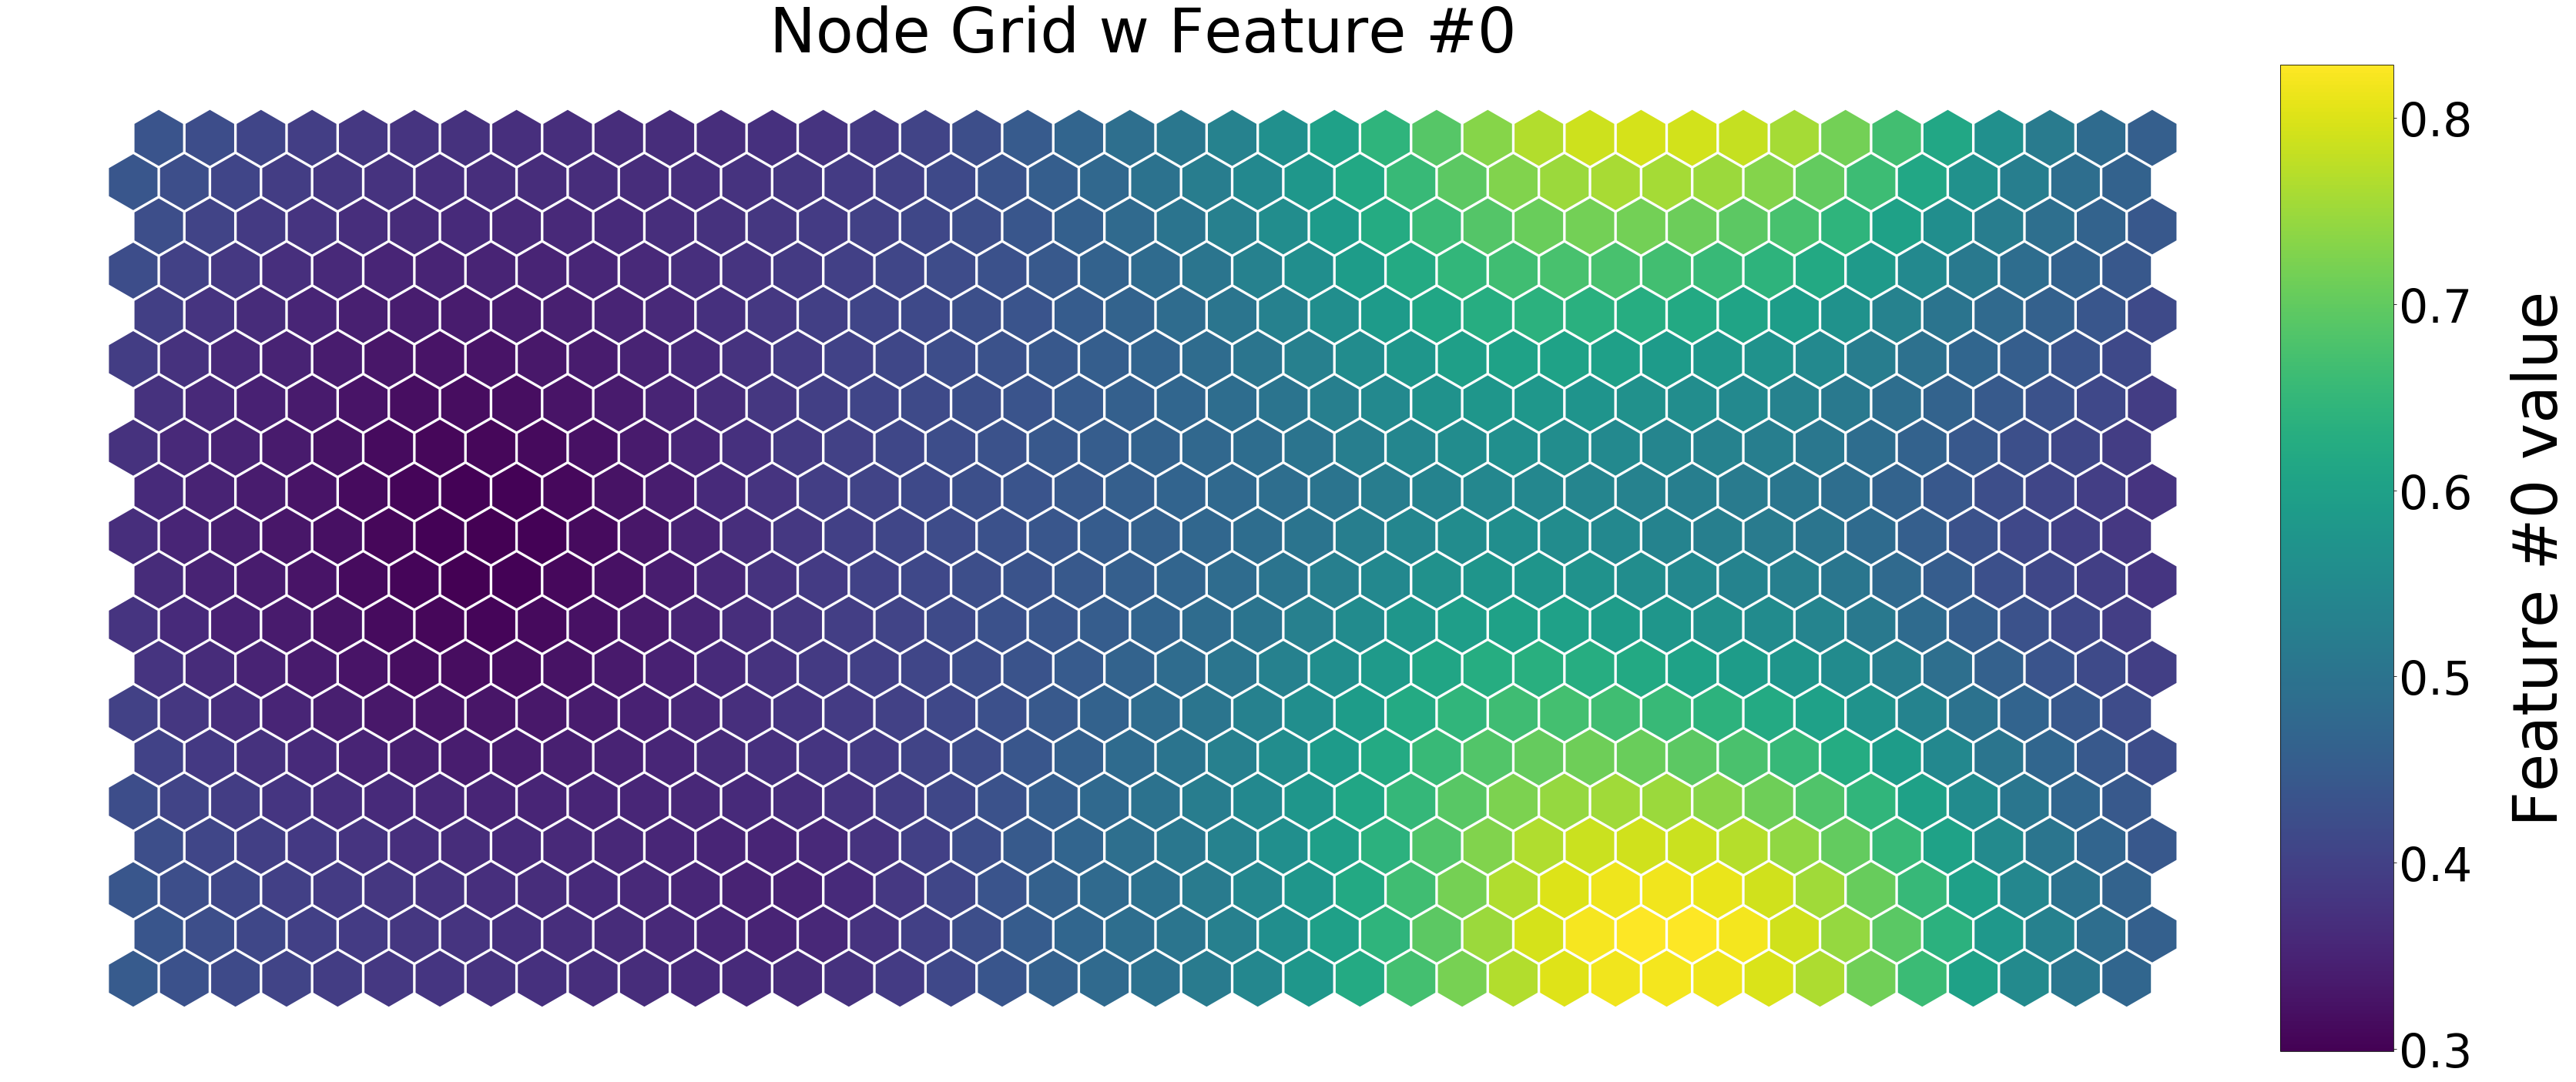

In [7]:
net.nodes_graph(colnum=0)
import matplotlib.pyplot as plt
plt.show()

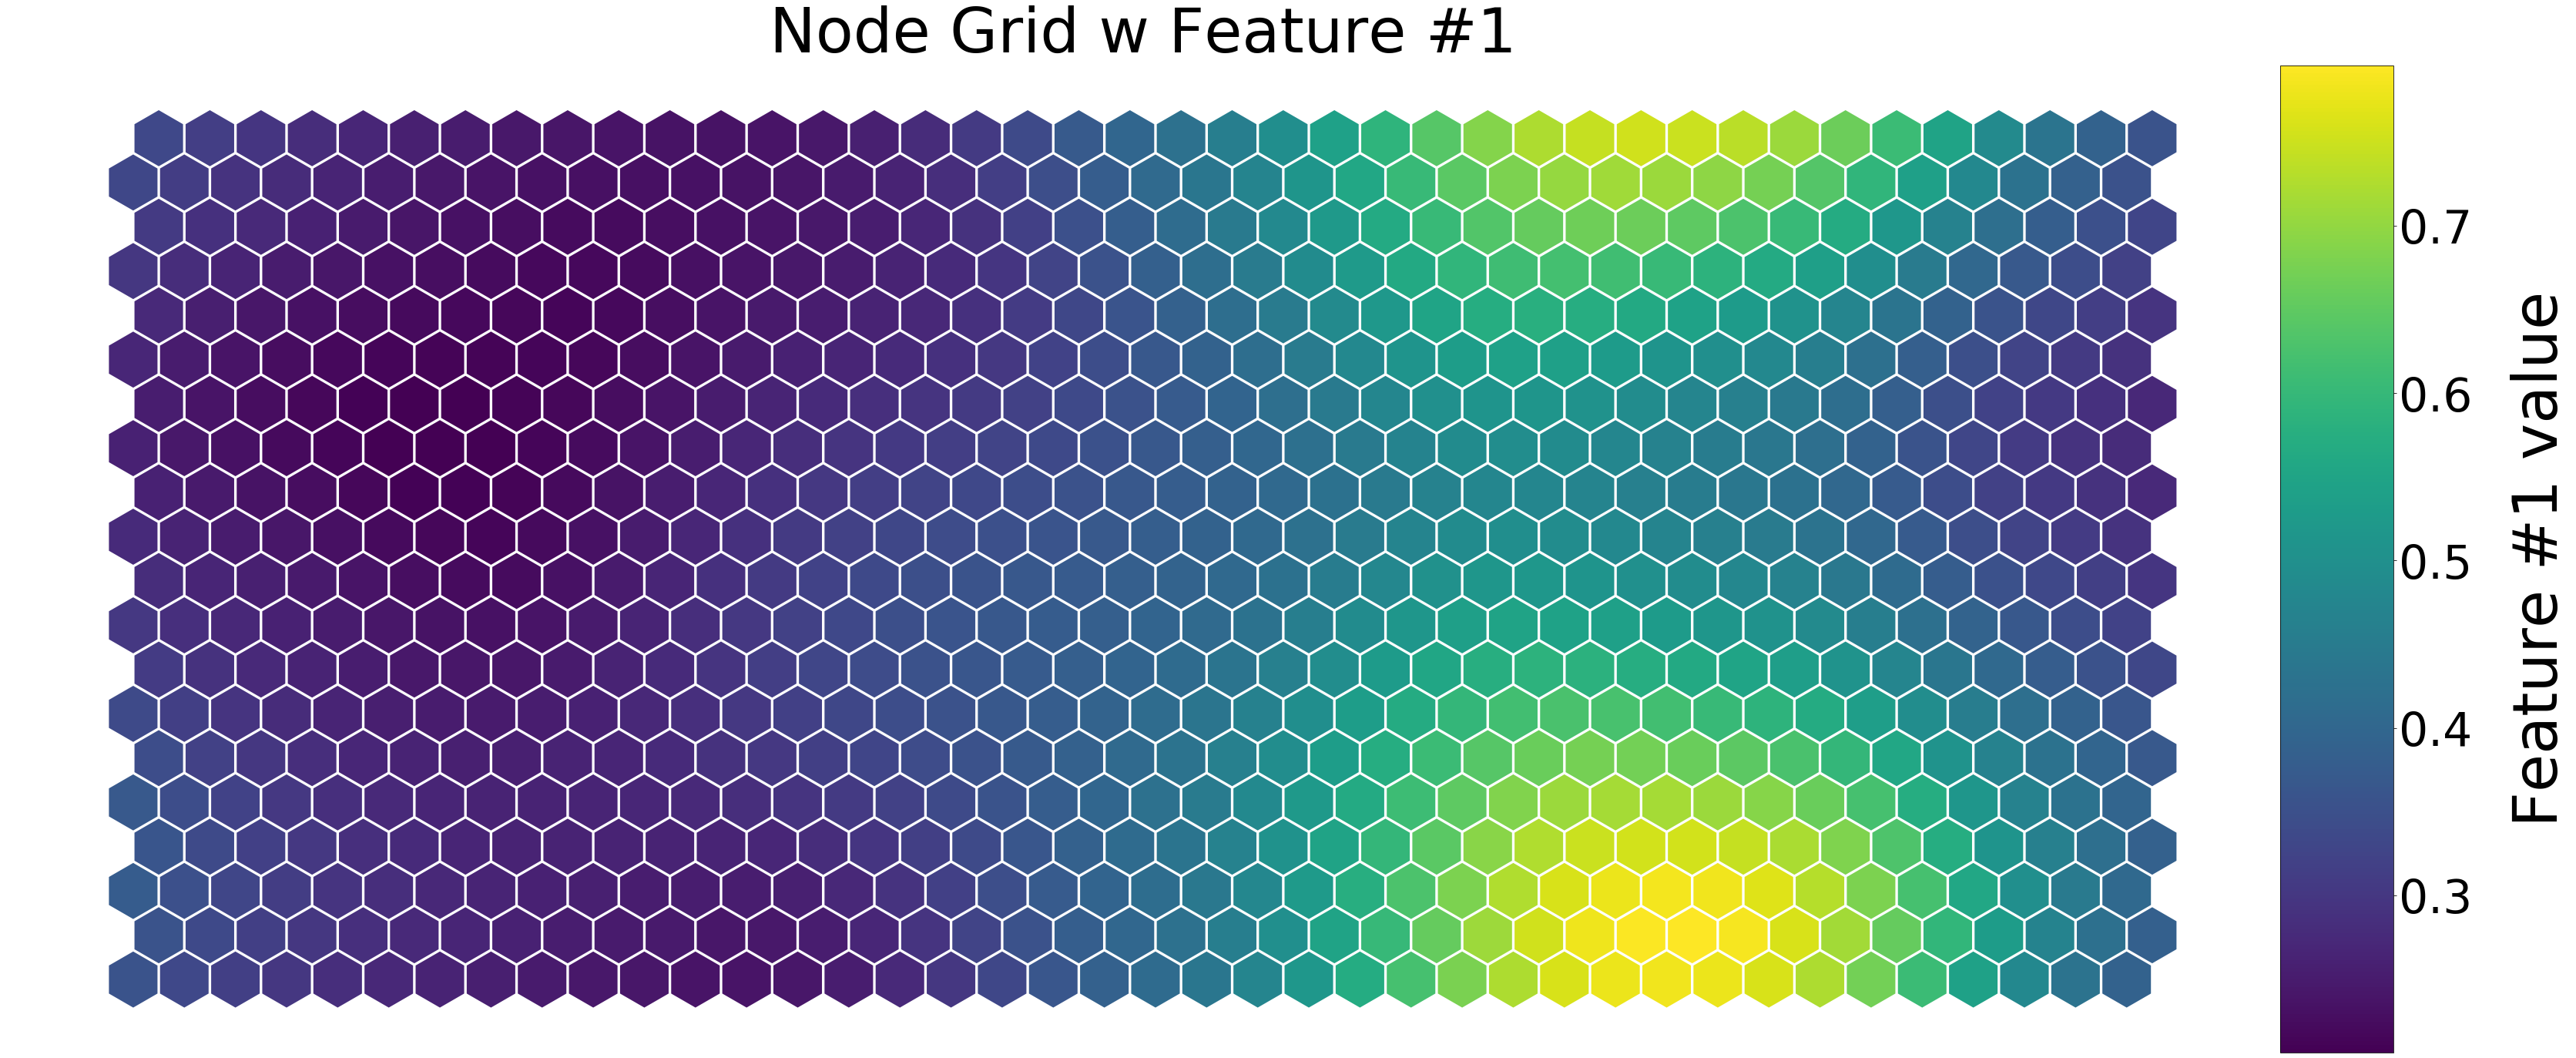

In [8]:
net.nodes_graph(colnum=1)
plt.show()

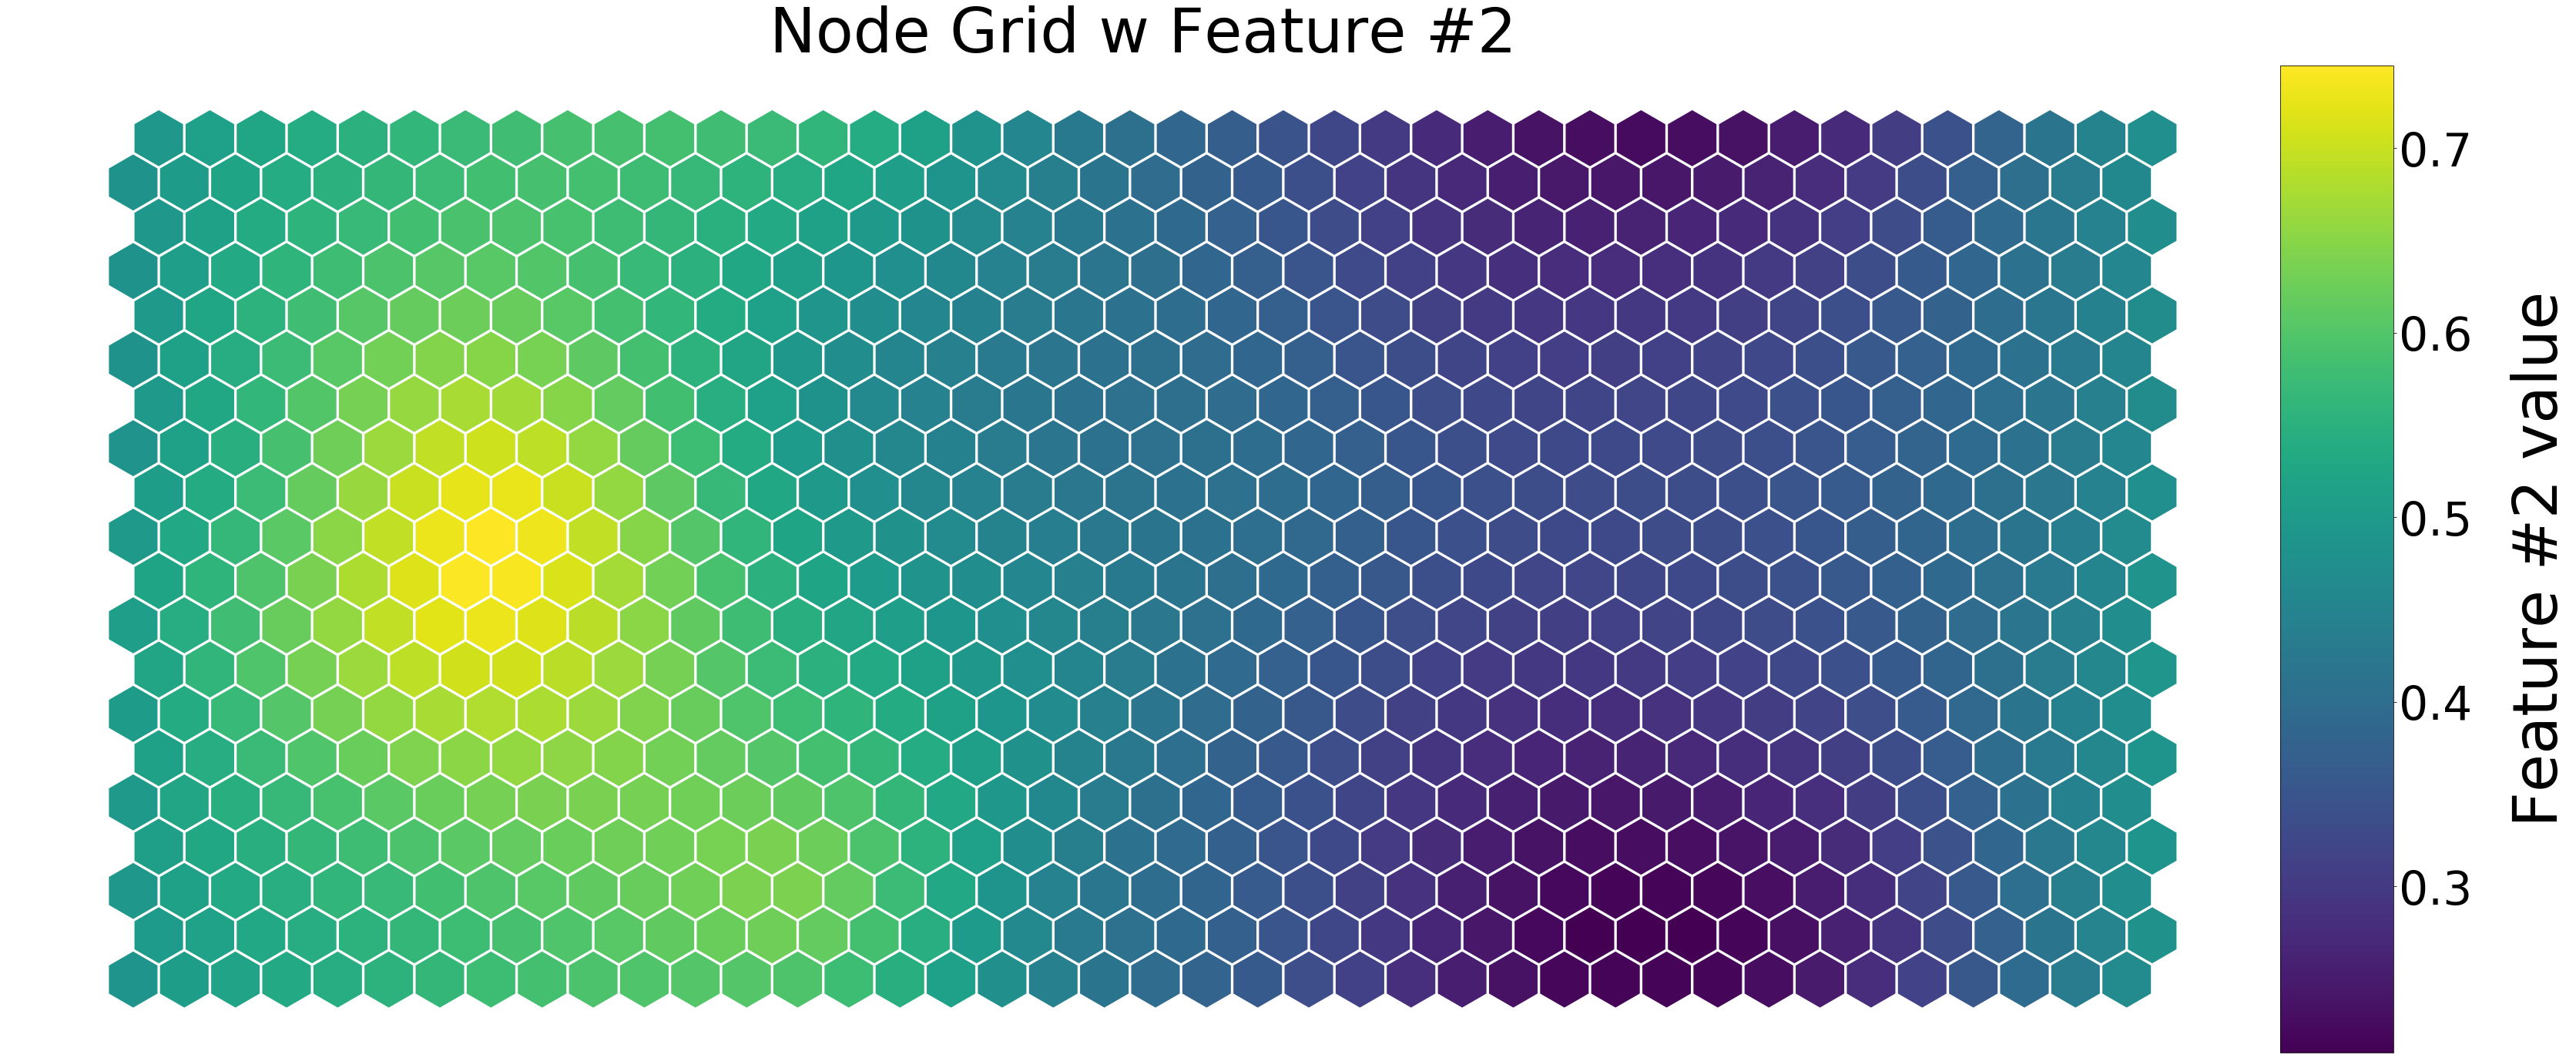

In [9]:
net.nodes_graph(colnum=2)
plt.show()

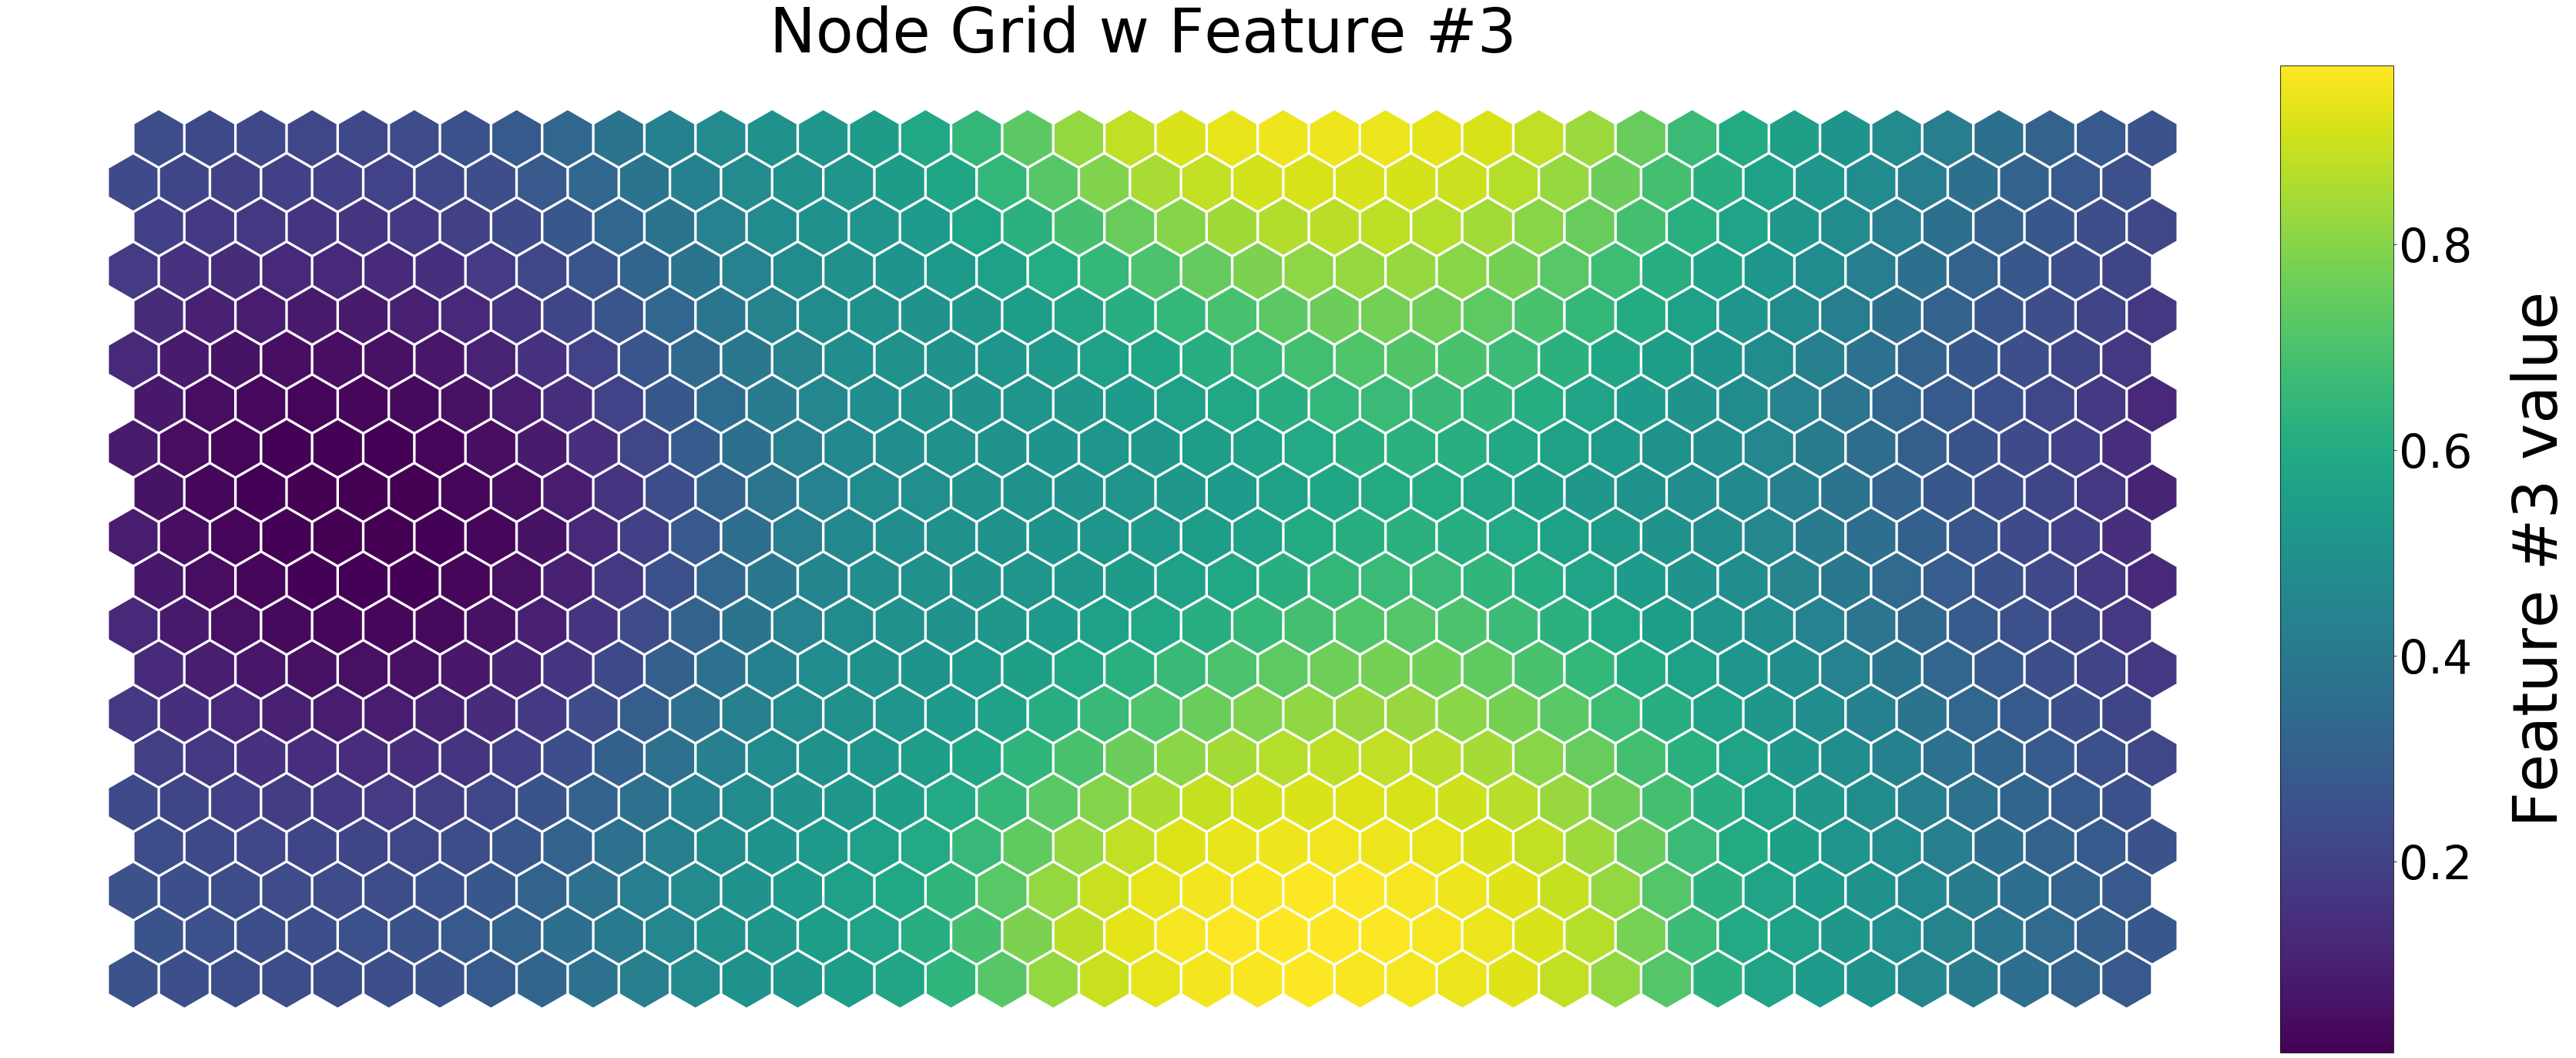

In [10]:
net.nodes_graph(colnum=3)
plt.show()

Исходя из построенных графиков видим следующую картиную. Те клиенты, которые часто посещают сайт(colnum=0, желтый цвет), совершают более разнообразный поиск товаров на сайте(colnum=1), имеют более низкую оценку относительно к-ва успешных заказов без возврата (colnum=2) и соответствуют високому рейтингу лояльности. На графиках наблюдается 2-а таких сектора. 

Также выделяется ещё один сектор с низкой посещаемостью, менее разнообразным поиском, высоким уровнем успешной доставки и более низким уровнем лояльности клиента. Также в правой части всех графиков можно заметить сектор со средним уровнем всех показателей. Посмотрим, какое к-во кластеров можно выделить на основе общего графика по всем параметрам.

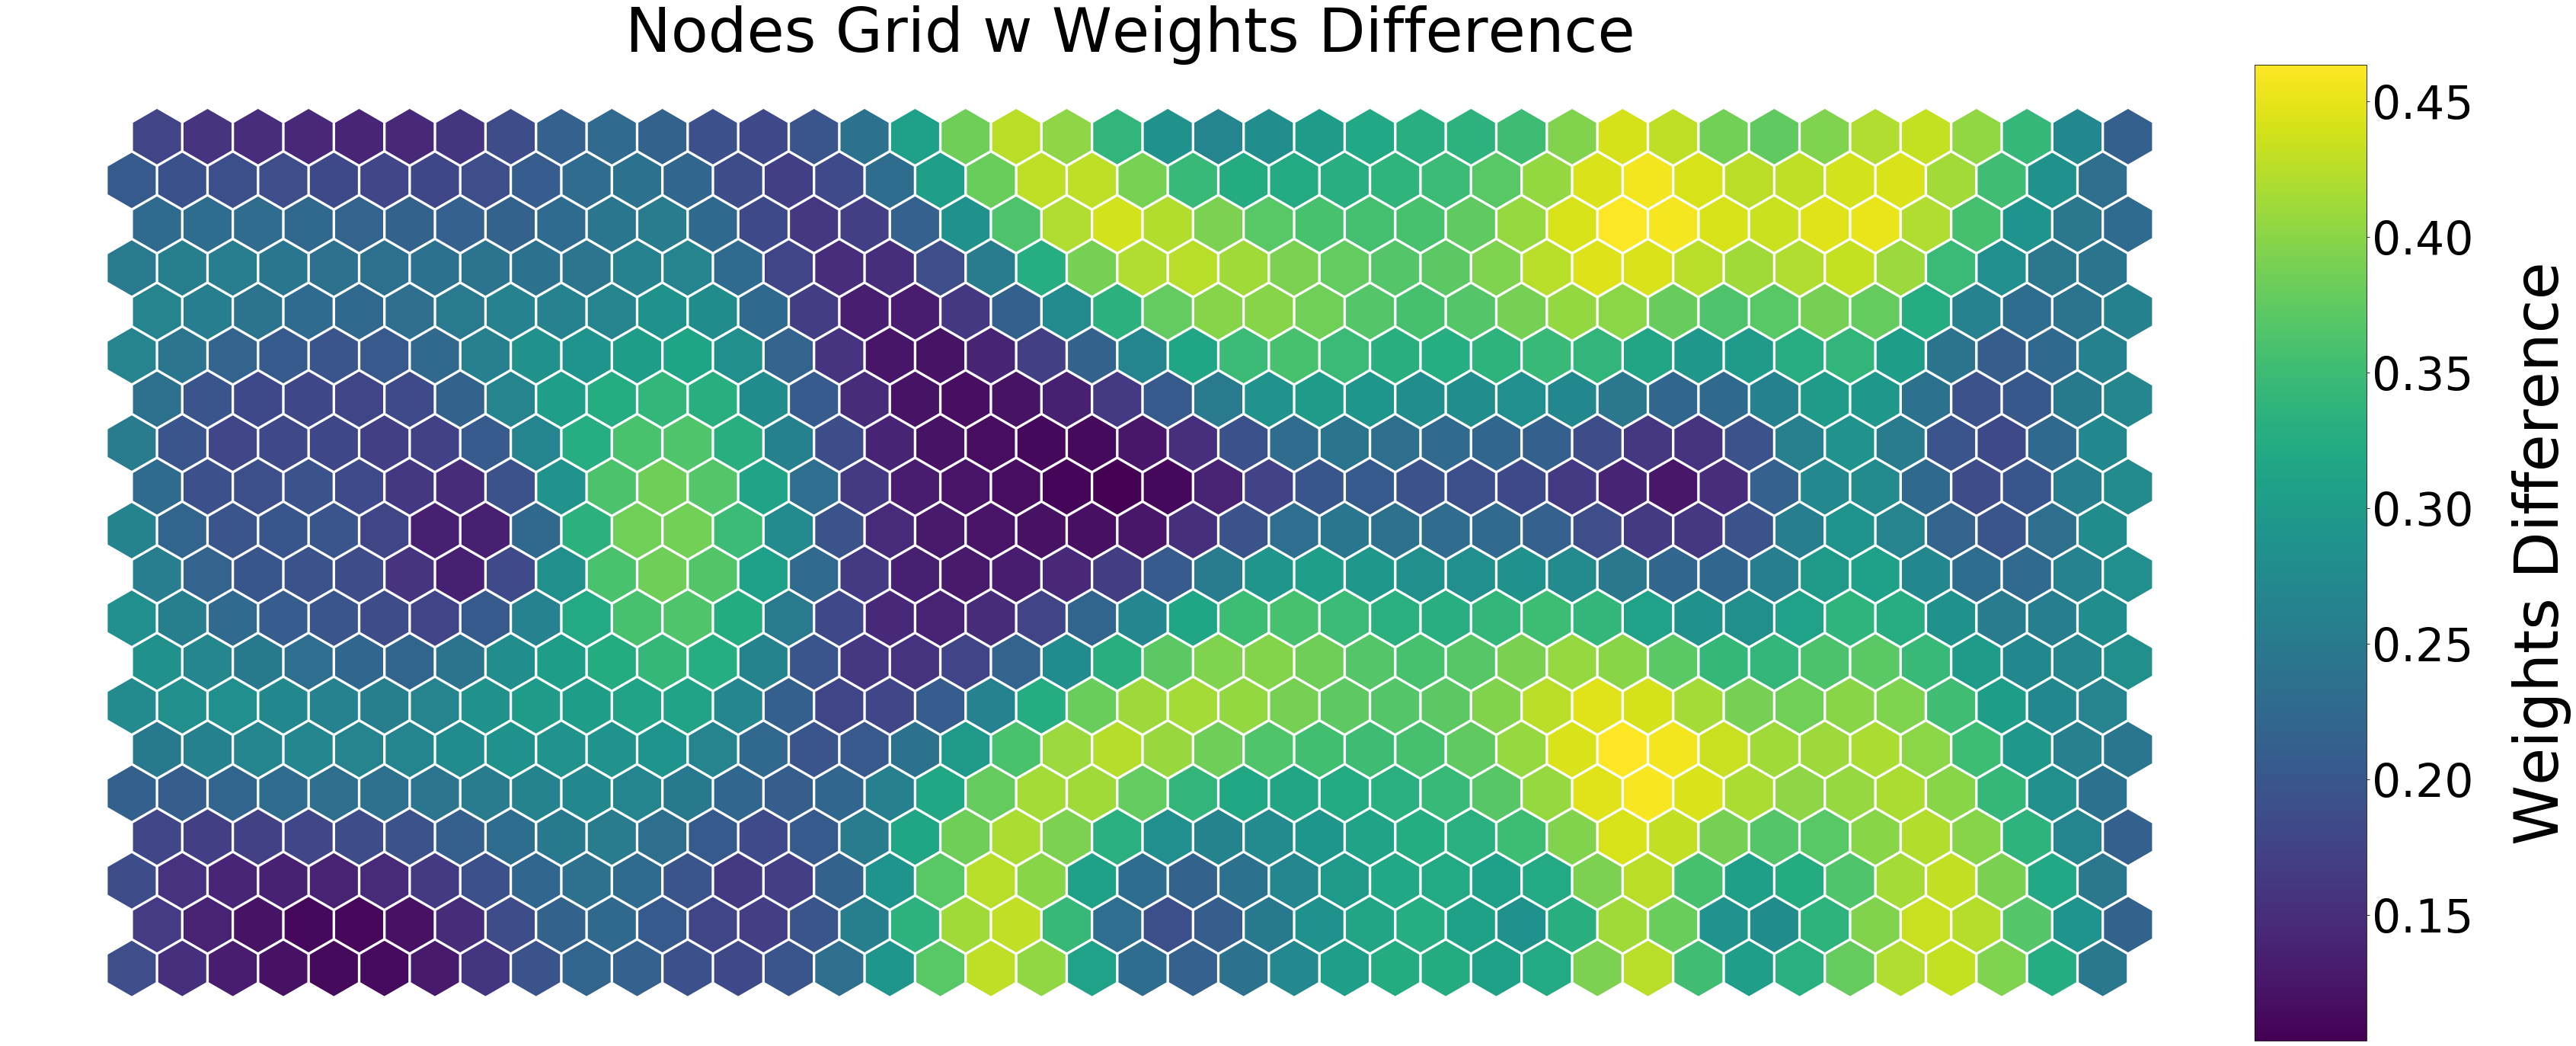

In [11]:
net.diff_graph()
plt.show()

Исходя из разности весов можно выделить достаточно большое к-во кластеров, порядка 7 и более. Но если смотреть на основные более одинаковые по размерности сектора, то очевидными будут три кластера. Сейчас посмотрим на график разброса, чтоб понять, где более плотное скопление точек.

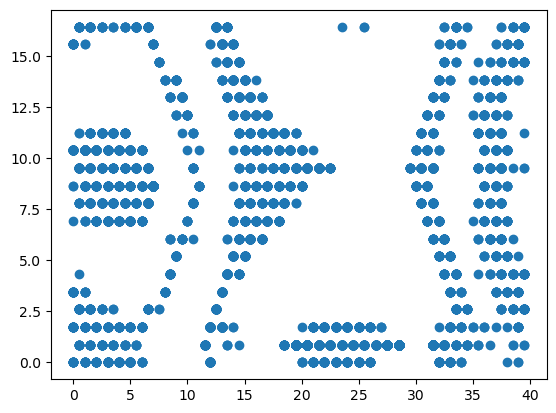

In [12]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Присутствуют некоторые области с более плотным размещением. Попробуем сравнить данные из кластеризации на основе К-средних с текущими данными. Будем сравнивать модели при делении на два и три кластера.  

In [21]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2, random_state=0).fit(prj)

In [15]:
import pickle
input = open('clust-km.pkl', 'rb')
obj = pickle.load(input)
input.close()
km2 = obj["km2"]
km3 = obj["km3"]
kmsign2 = obj["kmsign2"]
kmsign3 = obj["kmsign3"]

In [16]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(kmsign2,kmeans.labels_)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:123: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.374535290047176

In [20]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)

In [19]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(kmsign3,kmeans.labels_)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:123: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.24856300429872505

Как видим, оба варианта кластеризации очень плохо пересекаются с картрами Кохонена. Возможно, такой результат получен из-за недостаточной вариативности признаков.